# Run Harmony with rpy2 example

In [1]:
import os
import sys

JUPYTER_DIR = os.path.dirname(os.path.abspath("__file__"))
SYMPHONY_DIR = os.path.dirname(JUPYTER_DIR)
DATA_DIR = os.path.join(SYMPHONY_DIR, "data")
sys.path.append(SYMPHONY_DIR)
sys.path

['/home/ku/projs/symphony/benchmarking',
 '/home/ku/mambaforge/envs/symphony/lib/python310.zip',
 '/home/ku/mambaforge/envs/symphony/lib/python3.10',
 '/home/ku/mambaforge/envs/symphony/lib/python3.10/lib-dynload',
 '',
 '/home/ku/mambaforge/envs/symphony/lib/python3.10/site-packages',
 '/home/ku/projs/symphony']

In [2]:
import scanpy as sc
import symphonypy as sp

In [3]:
adata = sc.read_h5ad(os.path.join(DATA_DIR, "PBMC_Satija.h5ad"))

In [4]:
adata

AnnData object with n_obs × n_vars = 17159 × 20729
    obs: 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase'

In [5]:
n_top_genes = 3000
n_comps = 30

In [6]:
sc.pp.normalize_total(adata, target_sum=1e5)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(
    adata, batch_key="donor", n_top_genes=n_top_genes
)
sc.pp.scale(adata, zero_center=True, max_value=10)

sc.tl.pca(adata, n_comps=n_comps)

/home/ku/mambaforge/envs/symphony/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/ku/mambaforge/envs/symphony/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/ku/mambaforge/envs/symphony/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


/home/ku/mambaforge/envs/symphony/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


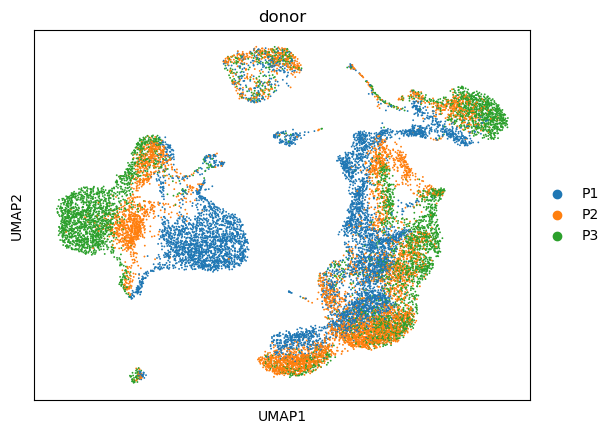

In [7]:
sc.pp.neighbors(adata, n_neighbors=20)
sc.tl.umap(adata)
sc.pl.umap(adata, color="donor")

In [29]:
import importlib
importlib.reload(sp)
importlib.reload(sp.pp)
importlib.reload(sp.tl)
importlib.reload(sp._utils)

<module 'symphonypy._utils' from '/home/ku/projs/symphony/symphonypy/_utils.py'>

In [34]:
kwargs = {
    "max.iter.harmony": 20
}
sp._utils._harmony_integrate_R(
    adata,
    "donor",
    random_seed=42,
    clear_ram=True,
    **kwargs
)

Harmony 1/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 2/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 3/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 4/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 5/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 6/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
********************

In [35]:
adata.uns["harmony"]["converged"]

True

In [ ]:
sc.pp.neighbors(adata, n_neighbors=20, use_rep="X_pca_harmony", key_added="Harmony_R")
adata

In [ ]:
sc.tl.umap(adata, neighbors_key="Harmony_R")
sc.pl.umap(adata, color="donor")